In [475]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [476]:

import requests, zipfile, io
r = requests.get('http://files.grouplens.org/datasets/movielens/ml-latest-small.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

#For python 3+, sub the StringIO module with the io module and use BytesIO instead of StringIO: 
#Here are release notes that mention this change.
    #import requests, zipfile, StringIO
    #r = requests.get(zip_file_url)
    #z = zipfile.ZipFile(io.BytesIO(r.content))
    #z.extractall("/path/to/destination_directory")

In [477]:
ls -a ml-latest-small

./           README.txt   movies.csv   tags.csv
../          links.csv    ratings.csv


In [478]:
movies = pd.read_csv('ml-latest-small/movies.csv')
tags = pd.read_csv('ml-latest-small/tags.csv')
ratings = pd.read_csv('ml-latest-small/ratings.csv')

In [479]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [480]:
movies.movieId.value_counts()

86014     1
1282      1
3347      1
1298      1
25870     1
         ..
60072     1
4775      1
50601     1
131749    1
83969     1
Name: movieId, Length: 9742, dtype: int64

In [481]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [482]:
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [483]:
tags.isnull().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [484]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [485]:
ratings.movieId.value_counts()

356       329
318       317
296       307
593       279
2571      278
         ... 
5986        1
100304      1
34800       1
83976       1
8196        1
Name: movieId, Length: 9724, dtype: int64

In [486]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [487]:
ratings.loc[(ratings['userId'] == 336) & (ratings['movieId'] == 1)]

,userId,movieId,rating,timestamp
51837,336,1,4.0,1122227329


In [488]:
ratings.loc[(ratings['userId'] ==474) & (ratings['movieId'] == 1)]

,userId,movieId,rating,timestamp
73092,474,1,4.0,978575760


In [489]:
ratings.loc[ratings.userId.isin([336, 474]) & (ratings['movieId'] == 1)]

,userId,movieId,rating,timestamp
51837,336,1,4.0,1122227329
73092,474,1,4.0,978575760


In [490]:
tags.sort_values(by='movieId', ascending=True)

# Tags correspong to movie dataset

,userId,movieId,tag,timestamp
2886,567,1,fun,1525286013
981,474,1,pixar,1137206825
629,336,1,pixar,1139045764
35,62,2,Robin Williams,1528843907
34,62,2,magic board game,1528843932
...,...,...,...,...
402,62,187595,star wars,1528934552
528,184,193565,comedy,1537098587
527,184,193565,anime,1537098582
530,184,193565,remaster,1537098592


In [491]:
master = movies.merge(tags,on ='movieId',how = 'inner')
master2 = master.merge(ratings,on = ['movieId', 'userId'],how = 'inner')
#on: 
#Column or index level names to join on. Must be found in both the left and right DataFrame and/or Series objects.

#how:
#inner: use intersection of keys from both frames, similar to a SQL inner join; preserve the order of the left keys.


In [492]:
master2

,movieId,title,genres,userId,tag,timestamp_x,rating,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,4.0,1122227329
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825,4.0,978575760
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1525286013,3.5,1525286001
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy,1528843929,4.0,1528843890
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game,1528843932,4.0,1528843890
...,...,...,...,...,...,...,...,...
3471,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,62,star wars,1528934552,4.0,1528934550
3472,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,anime,1537098582,3.5,1537098554
3473,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,comedy,1537098587,3.5,1537098554
3474,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,gintama,1537098603,3.5,1537098554


In [493]:
master2.drop(columns=['timestamp_x','timestamp_y'],inplace=True)

In [494]:
master2

,movieId,title,genres,userId,tag,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,3.5
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy,4.0
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game,4.0
...,...,...,...,...,...,...
3471,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,62,star wars,4.0
3472,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,anime,3.5
3473,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,comedy,3.5
3474,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,gintama,3.5


In [495]:
len(master2.userId.unique()) 

54

In [496]:
len(master2.movieId.unique()) 

1464

In [497]:
master2.sort_values(by='movieId', ascending=True, inplace = True)

In [498]:
master2

,movieId,title,genres,userId,tag,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,3.5
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy,4.0
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game,4.0
...,...,...,...,...,...,...
3471,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,62,star wars,4.0
3473,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,comedy,3.5
3474,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,gintama,3.5
3472,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,anime,3.5


In [499]:
master2.groupby('movieId')['rating'].mean().round(1)

movieId
1         3.8
2         3.8
3         2.5
5         1.5
7         3.0
         ... 
183611    4.0
184471    3.5
187593    4.0
187595    4.0
193565    3.5
Name: rating, Length: 1464, dtype: float64

In [500]:
master3 = master2.drop_duplicates(subset=['movieId'])

In [501]:
master3

,movieId,title,genres,userId,tag,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,4.0
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy,4.0
7,3,Grumpier Old Men (1995),Comedy|Romance,289,moldy,2.5
9,5,Father of the Bride Part II (1995),Comedy,474,pregnancy,1.5
11,7,Sabrina (1995),Comedy|Romance,474,remake,3.0
...,...,...,...,...,...,...
3461,183611,Game Night (2018),Action|Comedy|Crime|Horror,62,Comedy,4.0
3464,184471,Tomb Raider (2018),Action|Adventure|Fantasy,62,adventure,3.5
3467,187593,Deadpool 2 (2018),Action|Comedy|Sci-Fi,62,Josh Brolin,4.0
3470,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,62,Emilia Clarke,4.0


In [502]:
master3['ratings'] = master2.groupby('movieId')['rating'].transform(np.mean).round(1)

/Users/siddiqkhan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [503]:
master3

,movieId,title,genres,userId,tag,rating,ratings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,4.0,3.8
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy,4.0,3.8
7,3,Grumpier Old Men (1995),Comedy|Romance,289,moldy,2.5,2.5
9,5,Father of the Bride Part II (1995),Comedy,474,pregnancy,1.5,1.5
11,7,Sabrina (1995),Comedy|Romance,474,remake,3.0,3.0
...,...,...,...,...,...,...,...
3461,183611,Game Night (2018),Action|Comedy|Crime|Horror,62,Comedy,4.0,4.0
3464,184471,Tomb Raider (2018),Action|Adventure|Fantasy,62,adventure,3.5,3.5
3467,187593,Deadpool 2 (2018),Action|Comedy|Sci-Fi,62,Josh Brolin,4.0,4.0
3470,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,62,Emilia Clarke,4.0,4.0


In [504]:
master3.reset_index(drop=True, inplace = True)

In [505]:
master3.columns

Index(['movieId', 'title', 'genres', 'userId', 'tag', 'rating', 'ratings'], dtype='object')

In [506]:
master3

,movieId,title,genres,userId,tag,rating,ratings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,4.0,3.8
1,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy,4.0,3.8
2,3,Grumpier Old Men (1995),Comedy|Romance,289,moldy,2.5,2.5
3,5,Father of the Bride Part II (1995),Comedy,474,pregnancy,1.5,1.5
4,7,Sabrina (1995),Comedy|Romance,474,remake,3.0,3.0
...,...,...,...,...,...,...,...
1459,183611,Game Night (2018),Action|Comedy|Crime|Horror,62,Comedy,4.0,4.0
1460,184471,Tomb Raider (2018),Action|Adventure|Fantasy,62,adventure,3.5,3.5
1461,187593,Deadpool 2 (2018),Action|Comedy|Sci-Fi,62,Josh Brolin,4.0,4.0
1462,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,62,Emilia Clarke,4.0,4.0


In [507]:
master3['MovieId'] = master3.index

/Users/siddiqkhan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [508]:
master3.columns

Index(['movieId', 'title', 'genres', 'userId', 'tag', 'rating', 'ratings', 'MovieId'], dtype='object')

In [509]:
master3.drop(columns=['movieId','rating'],inplace=True)

/Users/siddiqkhan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [510]:
master3

,title,genres,userId,tag,ratings,MovieId
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,3.8,0
1,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy,3.8,1
2,Grumpier Old Men (1995),Comedy|Romance,289,moldy,2.5,2
3,Father of the Bride Part II (1995),Comedy,474,pregnancy,1.5,3
4,Sabrina (1995),Comedy|Romance,474,remake,3.0,4
...,...,...,...,...,...,...
1459,Game Night (2018),Action|Comedy|Crime|Horror,62,Comedy,4.0,1459
1460,Tomb Raider (2018),Action|Adventure|Fantasy,62,adventure,3.5,1460
1461,Deadpool 2 (2018),Action|Comedy|Sci-Fi,62,Josh Brolin,4.0,1461
1462,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,62,Emilia Clarke,4.0,1462


In [511]:
master3["ratings"] = master3["ratings"].astype(str)

/Users/siddiqkhan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [512]:
master3["important_features"] = master3["genres"] + ' '+ master3["tag"] + ' ' + master3["ratings"]

/Users/siddiqkhan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [513]:
master3['important_features']

0       Adventure|Animation|Children|Comedy|Fantasy pi...
1                  Adventure|Children|Fantasy fantasy 3.8
2                                Comedy|Romance moldy 2.5
3                                    Comedy pregnancy 1.5
4                               Comedy|Romance remake 3.0
                              ...                        
1459                Action|Comedy|Crime|Horror Comedy 4.0
1460               Action|Adventure|Fantasy adventure 3.5
1461                 Action|Comedy|Sci-Fi Josh Brolin 4.0
1462    Action|Adventure|Children|Sci-Fi Emilia Clarke...
1463            Action|Animation|Comedy|Sci-Fi comedy 3.5
Name: important_features, Length: 1464, dtype: object

In [514]:
master3['important_features'] = master3['important_features'].str.replace('|',',')

/Users/siddiqkhan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [515]:
master3['important_features'] = master3['important_features'].str.replace(' ',',')

/Users/siddiqkhan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [516]:
master3["important_features"] = master3['important_features'] + ','+ master3["title"]

/Users/siddiqkhan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [517]:
master3['important_features']

0       Adventure,Animation,Children,Comedy,Fantasy,pi...
1       Adventure,Children,Fantasy,fantasy,3.8,Jumanji...
2        Comedy,Romance,moldy,2.5,Grumpier Old Men (1995)
3       Comedy,pregnancy,1.5,Father of the Bride Part ...
4                Comedy,Romance,remake,3.0,Sabrina (1995)
                              ...                        
1459    Action,Comedy,Crime,Horror,Comedy,4.0,Game Nig...
1460    Action,Adventure,Fantasy,adventure,3.5,Tomb Ra...
1461    Action,Comedy,Sci-Fi,Josh,Brolin,4.0,Deadpool ...
1462    Action,Adventure,Children,Sci-Fi,Emilia,Clarke...
1463    Action,Animation,Comedy,Sci-Fi,comedy,3.5,Gint...
Name: important_features, Length: 1464, dtype: object

In [518]:
master3.important_features.iloc[8]

'Drama,Romance,Jane,Austen,5.0,Sense and Sensibility (1995)'

In [519]:
master3["important_features"] = master3["important_features"].astype(str)

/Users/siddiqkhan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [520]:
cm = CountVectorizer().fit_transform(master3['important_features'])

In [521]:
cs = cosine_similarity(cm)

print(cs)

[[1.         0.58925565 0.25197632 ... 0.11785113 0.28867513 0.28867513]
 [0.58925565 1.         0.13363062 ... 0.         0.20412415 0.        ]
 [0.25197632 0.13363062 1.         ... 0.13363062 0.         0.21821789]
 ...
 [0.11785113 0.         0.13363062 ... 1.         0.40824829 0.51031036]
 [0.28867513 0.20412415 0.         ... 0.40824829 1.         0.25      ]
 [0.28867513 0.         0.21821789 ... 0.51031036 0.25       1.        ]]


In [522]:
cs.shape

(1464, 1464)

In [523]:
# Title of the movie the user likes
Title = 'Jumanji (1995)'

# Find movies id
movie_id = master3[master3.title == Title]['MovieId'].values[0]

In [528]:
movie_id

1

In [524]:
# Create list of enumerations for similarity score [(movie_id, similarity score)]
# movie_id corresponds to cs row and movie_id value is where enumeration begins
# movie_id is where enumeration starts
scores = list(enumerate(cs[movie_id]))

In [525]:
# Sort List based on similarity score
sorted_scores = sorted(scores, key = lambda x: x[1], reverse = True)
sorted_scores = sorted_scores[1:]

In [526]:
# Print sorted scores
print(sorted_scores)

[(0, 0.5892556509887895), (1342, 0.5345224838248487), (485, 0.4714045207910316), (628, 0.4714045207910316), (1460, 0.4714045207910316), (189, 0.4472135954999579), (236, 0.4472135954999579), (763, 0.4472135954999579), (592, 0.4330127018922194), (617, 0.4330127018922194), (714, 0.4330127018922194), (1023, 0.4330127018922194), (1390, 0.42640143271122083), (14, 0.41666666666666663), (150, 0.408248290463863), (465, 0.408248290463863), (969, 0.408248290463863), (139, 0.40089186286863654), (332, 0.40089186286863654), (585, 0.40089186286863654), (678, 0.40089186286863654), (480, 0.39223227027636803), (1180, 0.39223227027636803), (1200, 0.39223227027636803), (1301, 0.39223227027636803), (1187, 0.3779644730092272), (231, 0.3749999999999999), (233, 0.3749999999999999), (343, 0.3749999999999999), (484, 0.3749999999999999), (1190, 0.3749999999999999), (1186, 0.36514837167011066), (1384, 0.36514837167011066), (214, 0.35355339059327373), (938, 0.35355339059327373), (1303, 0.35355339059327373), (1457,

In [527]:
#Create a loop for first 7 movie recommendations
j = 0
print('The 7 most recommended movies to', Title, 'are:\n')
for item in sorted_scores:
    movie_title = master3[master3.MovieId ==item[0]]['title'].values[0]
    print(j+1, movie_title)
    j = j + 1
    if j > 6:
        break
    

The 7 most recommended movies to Jumanji (1995) are:

1 Toy Story (1995)
2 Sintel (2010)
3 Watership Down (1978)
4 Toy Story 2 (1999)
5 Tomb Raider (2018)
6 Wizard of Oz, The (1939)
7 Alice in Wonderland (1951)


In [17]:
merge_list = master.groupby(by = ["userId"])["title"].apply(list).reset_index()
merge_list.head()

,userId,title
0,2,"[Step Brothers (2008), Step Brothers (2008), S..."
1,7,"[Departed, The (2006)]"
2,18,"[Carlito's Way (1993), Carlito's Way (1993), C..."
3,21,"[My Best Friend's Wedding (1997), My Best Frie..."
4,49,"[Interstellar (2014), Interstellar (2014), Int..."


In [18]:
merge_list = merge_list["title"].tolist()
merge_list[0:2]

[['Step Brothers (2008)',
  'Step Brothers (2008)',
  'Step Brothers (2008)',
  'Warrior (2011)',
  'Warrior (2011)',
  'Warrior (2011)',
  'Wolf of Wall Street, The (2013)',
  'Wolf of Wall Street, The (2013)',
  'Wolf of Wall Street, The (2013)'],
 ['Departed, The (2006)']]

In [19]:
merge_list

[['Step Brothers (2008)',
  'Step Brothers (2008)',
  'Step Brothers (2008)',
  'Warrior (2011)',
  'Warrior (2011)',
  'Warrior (2011)',
  'Wolf of Wall Street, The (2013)',
  'Wolf of Wall Street, The (2013)',
  'Wolf of Wall Street, The (2013)'],
 ['Departed, The (2006)'],
 ["Carlito's Way (1993)",
  "Carlito's Way (1993)",
  "Carlito's Way (1993)",
  'Godfather: Part II, The (1974)',
  'Godfather: Part II, The (1974)',
  'Pianist, The (2002)',
  'Pianist, The (2002)',
  'Lucky Number Slevin (2006)',
  'Fracture (2007)',
  'Fracture (2007)',
  'Fracture (2007)',
  'Upside Down: The Creation Records Story (2010)',
  'Upside Down: The Creation Records Story (2010)',
  'Upside Down: The Creation Records Story (2010)',
  'Just Eat It: A Food Waste Story (2014)',
  'Just Eat It: A Food Waste Story (2014)'],
 ["My Best Friend's Wedding (1997)",
  "My Best Friend's Wedding (1997)",
  'Big Eyes (2014)',
  'The Interview (2014)'],
 ['Interstellar (2014)', 'Interstellar (2014)', 'Interstellar

In [20]:
len(master.userId.unique())

58

In [21]:
len(merge_list)

58

In [22]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(merge_list).transform(merge_list)
#Via the fit method, the TransactionEncoder learns the unique labels in the dataset, 
#and via the transform method, it transforms the input dataset (a Python list of lists) into 
#a one-hot encoded NumPy boolean array:

df = pd.DataFrame(te_ary, columns=te.columns_)

In [23]:
df.head()

,(500) Days of Summer (2009),...And Justice for All (1979),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),"11'09""01 - September 11 (2002)",12 Angry Men (1957),127 Hours (2010),13 Going on 30 (2004),2001: A Space Odyssey (1968),21 Grams (2003),25th Hour (2002),28 Days Later (2002),"39 Steps, The (1935)",3:10 to Yuma (2007),"40-Year-Old Virgin, The (2005)","400 Blows, The (Les quatre cents coups) (1959)",42 Up (1998),84 Charing Cross Road (1987),8MM (1999),A Million Ways to Die in the West (2014),A Pigeon Sat on a Branch Reflecting on Existence (2014),A Story of Children and Film (2013),A.I. Artificial Intelligence (2001),About a Boy (2002),"Accused, The (1988)",Adam's Rib (1949),Addams Family Values (1993),"Addams Family, The (1991)","Adventures of Priscilla, Queen of the Desert, The (1994)","Adventures of Robin Hood, The (1938)","African Queen, The (1951)",After the Thin Man (1936),"Age of Innocence, The (1993)",Air Force One (1997),Airheads (1994),Airplane! (1980),Akira (1988),Aladdin (1992),Alfie (1966),Alice Adams (1935),Alice Doesn't Live Here Anymore (1974),Alice in Wonderland (1951),Alien (1979),Aliens (1986),Alive (1993),All About Eve (1950),All the King's Men (1949),All the President's Men (1976),All the Real Girls (2003),Almost Famous (2000),Amadeus (1984),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",Amen. (2002),America's Sweethearts (2001),American Gangster (2007),American History X (1998),American Movie (1999),American Pie (1999),"American President, The (1995)",American Splendor (2003),"American in Paris, An (1951)","Americanization of Emily, The (1964)",Anastasia (1956),Anatomy of a Murder (1959),Anchorman 2: The Legend Continues (2013),Anchorman: The Legend of Ron Burgundy (2004),And Then There Were None (1945),And the Band Played On (1993),"Andalusian Dog, An (Chien andalou, Un) (1929)",Angel's Egg (Tenshi no tamago) (1985),Angie (1994),Animal House (1978),"Animatrix, The (2003)",Anna Karenina (1997),Anne Frank Remembered (1995),Anne of the Thousand Days (1969),Annie Hall (1977),Another Thin Man (1939),"Apartment, The (1960)",Apocalypse Now (1979),Apollo 13 (1995),Arachnophobia (1990),Argo (2012),"Aristocats, The (1970)",Armageddon (1998),Around the World in 80 Days (1956),Arrival (2016),"Arrival, The (1996)",Arsenic and Old Lace (1944),"Astronaut's Wife, The (1999)",Au Hasard Balthazar (1966),Auntie Mame (1958),Avalon (1990),Avatar (2009),"Avengers, The (2012)",Avengers: Infinity War - Part I (2018),"Aviator, The (2004)","Awful Truth, The (1937)","Babadook, The (2014)",Babe (1995),Babel (2006),Babette's Feast (Babettes gæstebud) (1987),Babylon 5: In the Beginning (1998),"Bachelor and the Bobby-Soxer, The (1947)",Back to the Future (1985),Back to the Future Part II (1989),Bad Day at Black Rock (1955),"Bad News Bears, The (1976)","Bad Seed, The (1956)","Bad and the Beautiful, The (1952)","Ballad of Jack and Rose, The (2005)","Bank Job, The (2008)",Barton Fink (1991),"Basketball Diaries, The (1995)",Batman (1989),Batman Forever (1995),Batman Returns (1992),Batman v Superman: Dawn of Justice (2016),Battle Royale (Batoru rowaiaru) (2000),"Battle of Algiers, The (La battaglia di Algeri) (1966)",Beasts of No Nation (2015),Beasts of the Southern Wild (2012),Beat the Devil (1953),"Beautiful Mind, A (2001)",Beauty and the Beast (1991),Before Sunrise (1995),Before Sunset (2004),Begotten (1990),Being Julia (2004),Being There (1979),"Believer, The (2001)",Bend It Like Beckham (2002),Benny & Joon (1993),Best in Show (2000),Better Luck Tomorrow (2002),Better Off Dead... (1985),Beyond Silence (Jenseits der Stille) (1996),Big (1988),Big Business (1988),Big Daddy (1999),Big Eyes (2014),Big Fish (2003),Big Hero 6 (2014),"Big Kahuna, The (2000)","Big Lebowski, The (1998)",Big Night (1996),"Big Short, The (2015)","Big Sleep, The (1946)",Big Top Pee-Wee (1988),Bill & Ted's Bogus Journey (1991),Bill & Ted's Excellent Adventure (1989

In [24]:
df.shape

(58, 1572)

In [25]:
from mlxtend.frequent_patterns import apriori
%time
apriori_frequent_itemsets = apriori(df, min_support=0.01,use_colnames=True, max_len = 2)
#1% support value, and maxixmum length of two items in each row is selected

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs


In [26]:
apriori_frequent_itemsets['itemsets'].apply(lambda x: len(x)).value_counts()
#len(x) counts objects in list
#.value_counts() counts unique len(x) counts


2    774986
1      1572
Name: itemsets, dtype: int64

In [27]:
apriori_frequent_itemsets

,support,itemsets
0,0.017241,((500) Days of Summer (2009))
1,0.017241,(...And Justice for All (1979))
2,0.017241,(10 Cloverfield Lane (2016))
3,0.017241,(10 Things I Hate About You (1999))
4,0.017241,(101 Dalmatians (1996))
...,...,...
776553,0.017241,"(Zulu (1964), Zelary (2003))"
776554,0.017241,"(eXistenZ (1999), Zelary (2003))"
776555,0.017241,"(Zelig (1983), Zulu (1964))"
776556,0.017241,"(Zelig (1983), eXistenZ (1999))"


In [31]:
apriori_frequent_itemsets['length'] = apriori_frequent_itemsets['itemsets'].apply(lambda x: len(x))
apriori_frequent_itemsets
apriori_frequent_itemsets.to_csv('frequent_itemset.csv')

In [29]:
apriori_frequent_itemsets[(apriori_frequent_itemsets['length'] > 1)
                          & (apriori_frequent_itemsets['support'] > 0.051)]

,support,itemsets,length
51559,0.051724,"(American History X (1998), Game, The (1997))",2
51844,0.051724,"(American History X (1998), Matrix, The (1999))",2
52147,0.051724,"(American History X (1998), Schindler's List (...",2
148083,0.068966,"(Blade Runner (1982), Donnie Darko (2001))",2
148090,0.051724,(Dr. Strangelove or: How I Learned to Stop Wor...,2
148117,0.068966,"(Eternal Sunshine of the Spotless Mind (2004),...",2
148340,0.051724,"(Inception (2010), Blade Runner (1982))",2
148508,0.068966,"(Memento (2000), Blade Runner (1982))",2
148679,0.051724,"(Pi (1998), Blade Runner (1982))",2
148723,0.051724,"(Psycho (1960), Blade Runner (1982))",2


In [30]:
apriori_frequent_itemsets[(apriori_frequent_itemsets['length'] != 1)]

,support,itemsets,length
1572,0.017241,"(Akira (1988), (500) Days of Summer (2009))",2
1573,0.017241,"(American Pie (1999), (500) Days of Summer (20...",2
1574,0.017241,"(Avatar (2009), (500) Days of Summer (2009))",2
1575,0.017241,"(Babe (1995), (500) Days of Summer (2009))",2
1576,0.017241,"(Big Daddy (1999), (500) Days of Summer (2009))",2
...,...,...,...
776553,0.017241,"(Zulu (1964), Zelary (2003))",2
776554,0.017241,"(eXistenZ (1999), Zelary (2003))",2
776555,0.017241,"(Zelig (1983), Zulu (1964))",2
776556,0.017241,"(Zelig (1983), eXistenZ (1999))",2


In [29]:
apriori_frequent_itemsets[apriori_frequent_itemsets['itemsets'].apply(lambda x: 'Donnie Darko (2001)' in str(x))]

,support,itemsets,length
370,0.086207,(Donnie Darko (2001)),1
1581,0.017241,"((500) Days of Summer (2009), Donnie Darko (20...",2
1923,0.017241,"(...And Justice for All (1979), Donnie Darko (...",2
2898,0.017241,"(10 Cloverfield Lane (2016), Donnie Darko (2001))",2
3264,0.017241,"(Donnie Darko (2001), 10 Things I Hate About Y...",2
...,...,...,...
319473,0.017241,"(Donnie Darko (2001), Zelary (2003))",2
319474,0.017241,"(Donnie Darko (2001), Zelig (1983))",2
319475,0.017241,"(Zoolander (2001), Donnie Darko (2001))",2
319476,0.017241,"(Donnie Darko (2001), Zulu (1964))",2


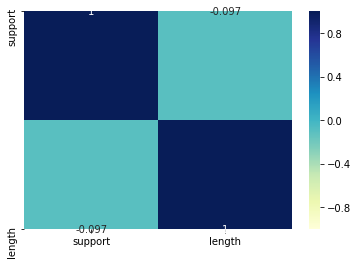

In [30]:
import seaborn as sns
sns.heatmap(data=apriori_frequent_itemsets.corr(method='spearman'),
           annot=True,
           vmin=-1,
           vmax=1,
           center=0,
           cmap='YlGnBu');

In [31]:
%%time
from mlxtend.frequent_patterns import association_rules
rules = association_rules(apriori_frequent_itemsets,metric="lift",min_threshold=0.01)

CPU times: user 10.9 s, sys: 497 ms, total: 11.4 s
Wall time: 11.1 s


In [32]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,((500) Days of Summer (2009)),(Akira (1988)),0.017241,0.017241,0.017241,1.0,58.0,0.016944,inf
1,(Akira (1988)),((500) Days of Summer (2009)),0.017241,0.017241,0.017241,1.0,58.0,0.016944,inf
2,((500) Days of Summer (2009)),(American Pie (1999)),0.017241,0.017241,0.017241,1.0,58.0,0.016944,inf
3,(American Pie (1999)),((500) Days of Summer (2009)),0.017241,0.017241,0.017241,1.0,58.0,0.016944,inf
4,((500) Days of Summer (2009)),(Avatar (2009)),0.017241,0.034483,0.017241,1.0,29.0,0.016647,inf
...,...,...,...,...,...,...,...,...,...
1549967,(Zelig (1983)),(Zulu (1964)),0.017241,0.017241,0.017241,1.0,58.0,0.016944,inf
1549968,(Zelig (1983)),(eXistenZ (1999)),0.017241,0.017241,0.017241,1.0,58.0,0.016944,inf
1549969,(eXistenZ (1999)),(Zelig (1983)),0.017241,0.017241,0.017241,1.0,58.0,0.016944,inf
1549970,(Zulu (1964)),(eXistenZ (1999)),0.017241,0.017241,0.017241,1.0,58.0,0.016944,inf


In [33]:
rules['conviction'].unique()

array([       inf, 1.96551724, 1.31034483, 1.22844828, 1.47413793,
       1.09195402, 1.93103448, 1.44827586, 1.89655172, 1.6091954 ,
       1.28735632, 1.86206897, 2.89655172, 1.65517241, 1.07279693,
       1.82758621, 1.20689655, 1.26436782, 1.39655172, 2.79310345,
       2.84482759, 1.42241379, 1.58045977, 2.74137931, 1.18534483,
       1.37068966, 3.79310345, 2.48275862, 1.24137931, 1.1637931 ,
       1.2183908 , 1.10344828, 1.03448276, 4.65517241, 2.32758621,
       3.65517241, 3.72413793, 1.24137931, 1.05363985, 2.28448276,
       1.55172414, 4.56896552, 2.37068966, 2.06896552, 1.30541872,
       1.01532567, 1.37931034, 1.14224138, 3.31034483, 1.33004926])

In [34]:
rules[rules["antecedents"].apply(lambda x: 'Donnie Darko (2001)' in str(x))].sort_values(ascending=False,by='lift')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19,(Donnie Darko (2001)),((500) Days of Summer (2009)),0.086207,0.017241,0.017241,0.2,11.600000,0.015755,1.228448
634846,(Donnie Darko (2001)),(Penny Serenade (1941)),0.086207,0.017241,0.017241,0.2,11.600000,0.015755,1.228448
634862,(Donnie Darko (2001)),(Pi (1998)),0.086207,0.051724,0.051724,0.6,11.600000,0.047265,2.370690
634860,(Donnie Darko (2001)),(Phone Booth (2002)),0.086207,0.017241,0.017241,0.2,11.600000,0.015755,1.228448
634858,(Donnie Darko (2001)),"(Philadelphia Story, The (1940))",0.086207,0.017241,0.017241,0.2,11.600000,0.015755,1.228448
...,...,...,...,...,...,...,...,...,...
634436,(Donnie Darko (2001)),(Léon: The Professional (a.k.a. The Profession...,0.086207,0.051724,0.017241,0.2,3.866667,0.012782,1.185345
518397,(Donnie Darko (2001)),(Corpse Bride (2005)),0.086207,0.051724,0.017241,0.2,3.866667,0.012782,1.185345
603874,(Donnie Darko (2001)),"(Departed, The (2006))",0.086207,0.051724,0.017241,0.2,3.866667,0.012782,1.185345
635370,(Donnie Darko (2001)),(Star Wars: Episode IV - A New Hope (1977)),0.086207,0.172414,0.051724,0.6,3.480000,0.036861,2.068966


In [35]:
rules[rules["antecedents"].apply(lambda x: 'Donnie Darko (2001)' in str(x))].groupby(
    ['antecedents', 'consequents'])[['lift']].max().sort_values(ascending=False,by='lift').head(10)

lift
antecedents           consequents                                             
(Donnie Darko (2001)) ((500) Days of Summer (2009))                       11.6
                      (A Pigeon Sat on a Branch Reflecting on Existen...  11.6
                      (127 Hours (2010))                                  11.6
                      (25th Hour (2002))                                  11.6
                      (About a Boy (2002))                                11.6
                      (39 Steps, The (1935))                              11.6
                      (400 Blows, The (Les quatre cents coups) (1959))    11.6
                      (42 Up (1998))                                      11.6
                      (84 Charing Cross Road (1987))                      11.6
                      (8MM (1999))                                        11.6

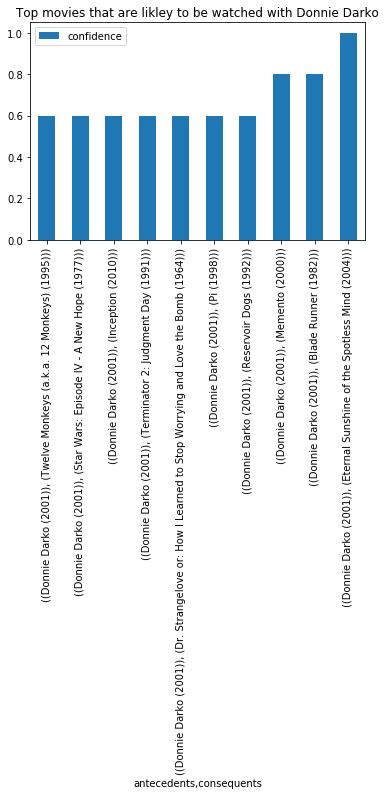

In [36]:
rules[rules["antecedents"].apply(lambda x: 'Donnie Darko (2001)' in str(x))].groupby(
    ['antecedents', 'consequents'])[['confidence']].max().sort_values(ascending=False,
      by='confidence').head(10).plot(kind='bar').invert_xaxis()

plt.title('Top movies that are likley to be watched with Donnie Darko');

In [37]:
rules['antecedents'] = rules.antecedents.apply(lambda x: next(iter(x)))
rules['consequents'] = rules.consequents.apply(lambda x: next(iter(x)))
#The next() function returns the next item from the iterator.

In [38]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(500) Days of Summer (2009),Akira (1988),0.017241,0.017241,0.017241,1.0,58.0,0.016944,inf
1,Akira (1988),(500) Days of Summer (2009),0.017241,0.017241,0.017241,1.0,58.0,0.016944,inf
2,(500) Days of Summer (2009),American Pie (1999),0.017241,0.017241,0.017241,1.0,58.0,0.016944,inf
3,American Pie (1999),(500) Days of Summer (2009),0.017241,0.017241,0.017241,1.0,58.0,0.016944,inf
4,(500) Days of Summer (2009),Avatar (2009),0.017241,0.034483,0.017241,1.0,29.0,0.016647,inf
...,...,...,...,...,...,...,...,...,...
1549967,Zelig (1983),Zulu (1964),0.017241,0.017241,0.017241,1.0,58.0,0.016944,inf
1549968,Zelig (1983),eXistenZ (1999),0.017241,0.017241,0.017241,1.0,58.0,0.016944,inf
1549969,eXistenZ (1999),Zelig (1983),0.017241,0.017241,0.017241,1.0,58.0,0.016944,inf
1549970,Zulu (1964),eXistenZ (1999),0.017241,0.017241,0.017241,1.0,58.0,0.016944,inf


findfont: Font family ['FreeMono'] not found. Falling back to DejaVu Sans.


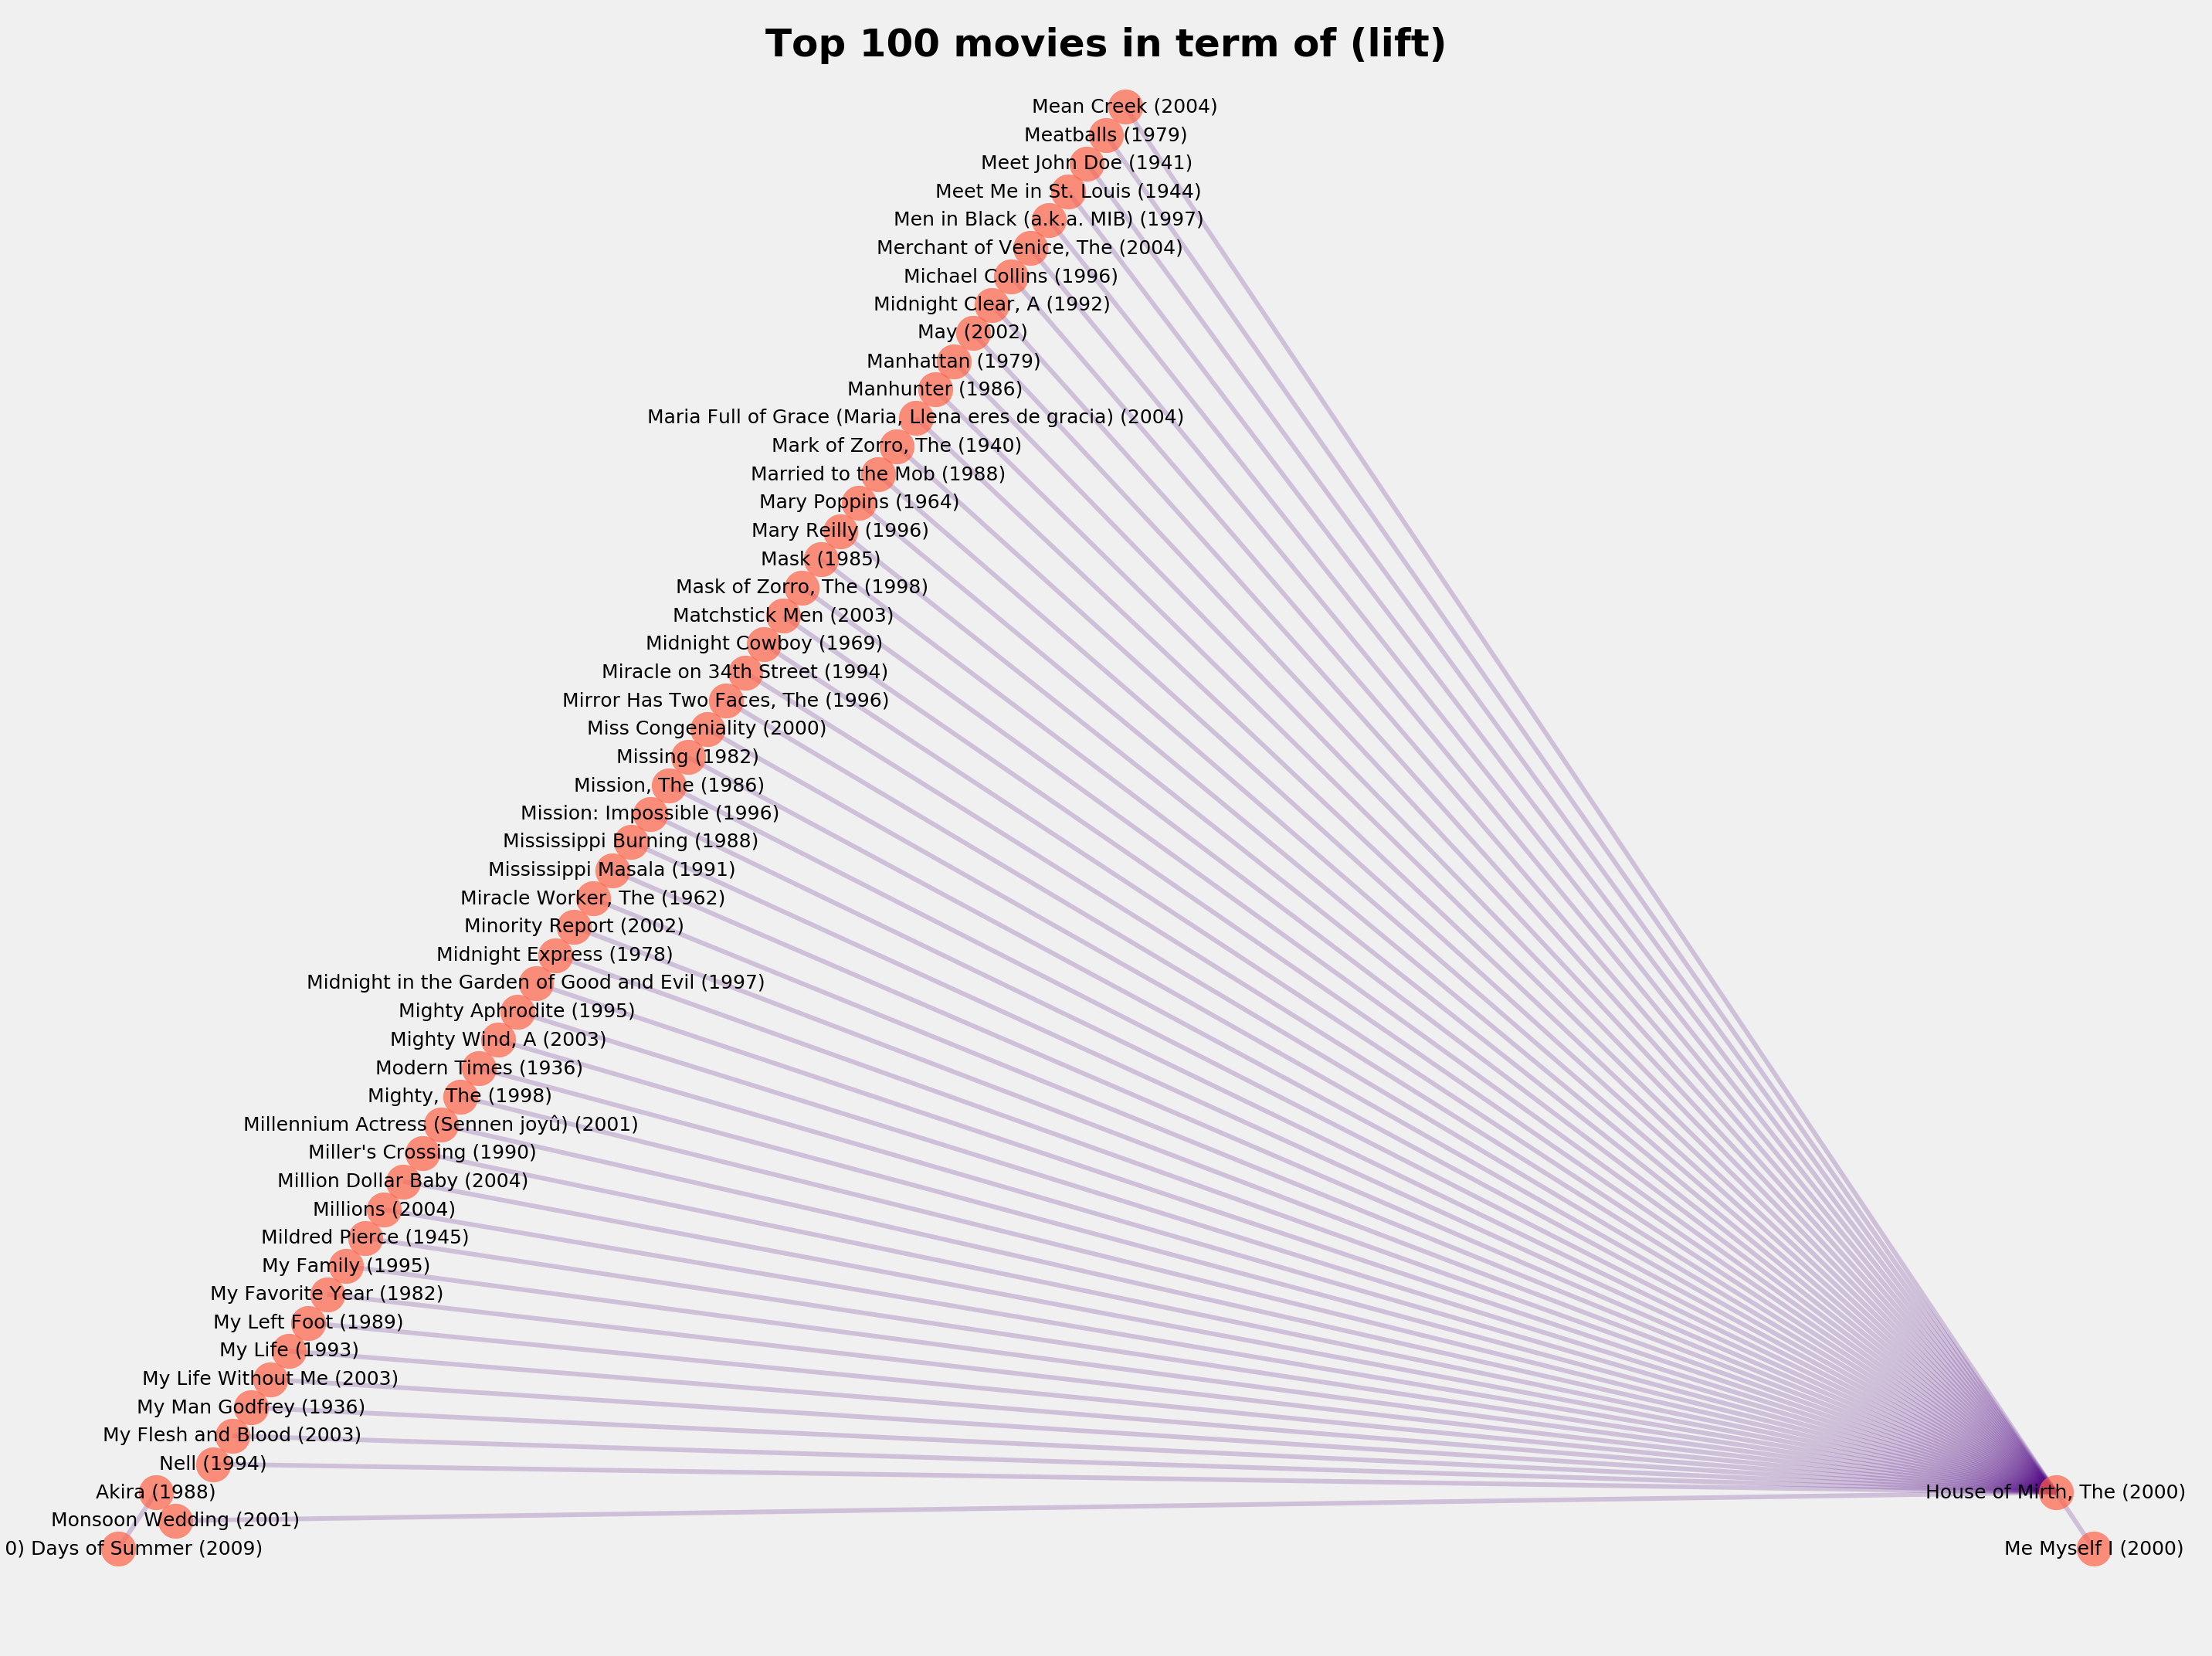

In [39]:
import networkx as nx
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
edges = nx.from_pandas_edgelist(rules.sort_values(ascending=False,by='lift').head(100)
                           ,source='antecedents',target='consequents',edge_attr=None)
plt.subplots(figsize=(40,30))
plt.suptitle('Top 100 movies in term of (lift)', fontsize = 50,fontweight = 'bold')
pos = nx.planar_layout(edges)
nx.draw_networkx_nodes(edges, pos, node_size = 2000,alpha= 0.7,node_color = 'tomato')
nx.draw_networkx_edges(edges, pos, width = 6, alpha = 0.2, edge_color = 'indigo')
nx.draw_networkx_labels(edges, pos, font_size = 25, font_family = 'FreeMono',weight='bold')
plt.grid()
plt.axis('off')
plt.tight_layout()
plt.show()

In [40]:
rules[rules["antecedents"].apply(lambda x: 'Mean Creek (2004)' in str(x))].groupby(
    ['antecedents', 'consequents'])[['lift']].max().sort_values(ascending=False,by='lift').head(10)

lift
antecedents       consequents                                             
Mean Creek (2004) ...And Justice for All (1979)                       58.0
                  Place in the Sun, A (1951)                          58.0
                  Pat and Mike (1952)                                 58.0
                  Passion of the Christ, The (2004)                   58.0
                  Passion of Joan of Arc, The (Passion de Jeanne ...  58.0
                  Passion Fish (1992)                                 58.0
                  Passage to India, A (1984)                          58.0
                  Parenthood (1989)                                   58.0
                  Parent Trap, The (1998)                             58.0
                  Parent Trap, The (1961)                             58.0

In [41]:
rules[rules["antecedents"].apply(lambda x: 'Meatballs (1979)' in str(x))].groupby(
    ['antecedents', 'consequents'])[['lift']].max().sort_values(ascending=False,by='lift').head(10)

lift
antecedents      consequents                                             
Meatballs (1979) ...And Justice for All (1979)                       58.0
                 Place in the Sun, A (1951)                          58.0
                 Pat and Mike (1952)                                 58.0
                 Passion of the Christ, The (2004)                   58.0
                 Passion of Joan of Arc, The (Passion de Jeanne ...  58.0
                 Passion Fish (1992)                                 58.0
                 Passage to India, A (1984)                          58.0
                 Parenthood (1989)                                   58.0
                 Parent Trap, The (1998)                             58.0
                 Parent Trap, The (1961)                             58.0

In [42]:
rules[rules["antecedents"].apply(lambda x: 'Manhattan (1979)' in str(x))].groupby(
    ['antecedents', 'consequents'])[['lift']].max().sort_values(ascending=False,by='lift').head(10)

lift
antecedents      consequents                                             
Manhattan (1979) ...And Justice for All (1979)                       58.0
                 Place in the Sun, A (1951)                          58.0
                 Pat and Mike (1952)                                 58.0
                 Passion of the Christ, The (2004)                   58.0
                 Passion of Joan of Arc, The (Passion de Jeanne ...  58.0
                 Passion Fish (1992)                                 58.0
                 Passage to India, A (1984)                          58.0
                 Parenthood (1989)                                   58.0
                 Parent Trap, The (1998)                             58.0
                 Parent Trap, The (1961)                             58.0

In [46]:
rules[rules["antecedents"].apply(lambda x: '(500) Days of Summer (2009)' in str(x))].groupby(
    ['antecedents', 'consequents'])[['lift']].max().sort_values(ascending=False,by='lift').head(10)

lift
antecedents                 consequents                                             
(500) Days of Summer (2009) Akira (1988)                                        58.0
                            Session 9 (2001)                                    58.0
                            Lady in the Water (2006)                            58.0
                            Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (2...  58.0
                            Moon (2009)                                         58.0
                            More (1998)                                         58.0
                            Neon Genesis Evangelion: Death & Rebirth (Shin ...  58.0
                            American Pie (1999)                                 58.0
                            Paprika (Papurika) (2006)                           58.0
                            Punisher, The (2004)                                58.0